## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [74]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Let's use the data we processed in the titanic assigment and load it below.

In [75]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [76]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


Split the data into train and test with 20% of data in test.

In [77]:
#@Split Train Test for Models
#Size of the test set and target variable to split the data.

df =  titanic#@param dataframe
target = 'Survived' #@param target
SIZE = 0.2 #@param split rate

y = df[target]
X = df.drop(columns=[target])

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 711 training samples and 178 test samples


Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [78]:
# Answer below

model = Sequential()
#One
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
#Two
model.add(Dense(64, activation='relu'))
#Three
model.add(Dense(32, activation='relu'))
#Four
model.add(Dense(32, activation='relu'))
#Five
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 12,833
Trainable params: 12,833
Non-trainable params: 0
_________________________________________________________________


Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

In [79]:
# Answer below:
from keras.optimizers import SGD

opt = SGD(learning_rate=0.05)


compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

In [80]:
# Answer below:
model.compile(loss='MSE', optimizer=opt, 
              metrics=['accuracy'])
model.fit(X_train, y_train, verbose=0, epochs=50, batch_size=100)
evals = model.evaluate(X_test, y_test)
results = {'model' : 'B100E50', 'loss': evals[0], 'accuracy': evals[1]}

6/6 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.7753


Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

In [81]:
# Answer below:
# Answer below:
model.compile(loss='MSE', optimizer=opt, 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, batch_size=100, validation_data=(X_test, y_test), verbose=0)
evals = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.7978


In [82]:
results = pd.DataFrame([results, {'model' : 'B100E500', 'loss': evals[0], 'accuracy': evals[1]}])
results

,model,loss,accuracy
0,B100E50,0.148451,0.775281
1,B100E500,0.147343,0.797753


Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

In [83]:
# Answer below:
# Answer below:
# Answer below:
model.compile(loss='MSE', optimizer=opt, 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=200, validation_data=(X_test, y_test), verbose=0)
evals = model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.7921


In [84]:
results = results.append({'model' : 'B200E200', 'loss': evals[0], 'accuracy': evals[1]}, ignore_index=True)
results

,model,loss,accuracy
0,B100E50,0.148451,0.775281
1,B100E500,0.147343,0.797753
2,B200E200,0.147934,0.792135


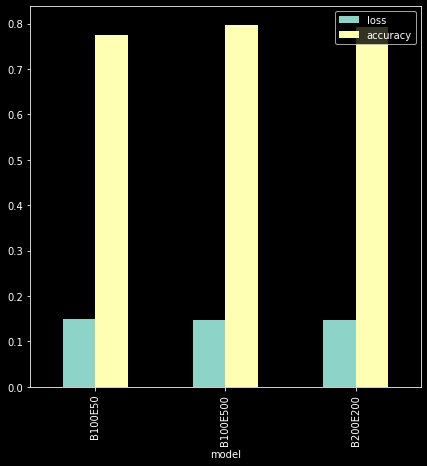

In [85]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
results.plot.bar(figsize=(7,7), x='model')
plt.show()

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [86]:
# Answer below

model = Sequential()
#One
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
#Two
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
#Three
model.add(Dense(64, activation='relu'))
#Four
model.add(Dense(64, activation='relu'))
#Five
model.add(Dense(32, activation='relu'))
#Six
model.add(Dense(32, activation='relu'))
#Seven
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

In [87]:
# Answer below:
# Answer below:
# Answer below:
# Answer below:
model.compile(loss='MSE', optimizer=opt, 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=80, validation_data=(X_test, y_test), verbose=0)
evals = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.7921


In [88]:
results = results.append({'model' : '7LB200E200', 'loss': evals[0], 'accuracy': evals[1]}, ignore_index=True)
results

,model,loss,accuracy
0,B100E50,0.148451,0.775281
1,B100E500,0.147343,0.797753
2,B200E200,0.147934,0.792135
3,7LB200E200,0.145403,0.792135


Define a new SGD optimizer with a learning rate of 0.001

In [89]:
# Answer below:
opt2= SGD(learning_rate=0.001)


Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

In [90]:
# Answer below:
# Answer below:
# Answer below:
# Answer below:
# Answer below:
model.compile(loss='MSE', optimizer=opt2, 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=80, validation_data=(X_test, y_test), verbose=0)
evals = model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.1436 - accuracy: 0.7865


In [91]:
results = results.append({'model' : 'OPT27LB200E200', 'loss': evals[0], 'accuracy': evals[1]}, ignore_index=True)


In [92]:
results

,model,loss,accuracy
0,B100E50,0.148451,0.775281
1,B100E500,0.147343,0.797753
2,B200E200,0.147934,0.792135
3,7LB200E200,0.145403,0.792135
4,OPT27LB200E200,0.143596,0.786517


I have fewer iterations and a smaller batch size with a smaller learning rate. A smaller learning rate means that there are smaller steps being taken, so it can take longer to get there. 

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [95]:
#Returns an dataframe of my predicted data, actual data, and the errors
def error_table(pred, actual):
  errs = pd.DataFrame({'prediction': pred, 'actual': actual})
  errs['err'] = pred - actual
  errs['err_size'] = abs(pred - actual)
  errs['isErr'] = np.where(errs['err_size'] > 0, 1, 0)
  return errs

In [97]:
# Answer below:
preds = (model.predict(X_test) > 0.5).astype("int32")
preds = preds.reshape(preds.shape[0],)
errs = error_table(preds, y_test)

errs.head()

,prediction,actual,err,err_size,isErr
662,0,0,0,0,0
819,1,1,0,0,0
88,0,0,0,0,0
539,1,1,0,0,0
23,0,1,-1,1,1


In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds)

array([[96, 14],
       [24, 44]])